In [4]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from astropy.visualization import MinMaxInterval, AsinhStretch, ImageNormalize
from baobab import bnn_priors
from baobab.configs import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Visualizing the images

__Author:__ Ji Won Park (@jiwoncpark)
    
__Created:__ 8/30/19
    
__Last run:__ 9/05/19

In this notebook, we'll visualize the images generated with `DiagonalBNNPrior` via the configuration in `tdlmc_diagonal_config.py`.

In [7]:
#cfg_path = tdlmc_diagonal_config.__file__
cfg_path = tdlmc_empirical_config.__file__
#cfg_path = os.path.join('..', '..', 'time_delay_lens_modeling_challenge', 'data', 'baobab_configs', 'train_tdlmc_diagonal_config.py')
cfg = Config.fromfile(cfg_path)
#out_data_dir = os.path.join('..', '..', 'time_delay_lens_modeling_challenge', cfg.out_dir)
out_data_dir = os.path.join('..', cfg.out_dir)
meta = pd.read_csv(os.path.join(out_data_dir, 'metadata.csv'), index_col=None)
bnn_prior = getattr(bnn_priors, cfg.bnn_prior_class)(cfg.bnn_omega, cfg.components)

In [8]:
img_files = [fname for fname in os.listdir(out_data_dir) if fname.endswith('.npy')]

In [9]:
# TODO: description, asinh scale...

lens_mass_center_x                                                 1.2011e-07
lens_mass_center_y                                                3.60988e-08
lens_mass_gamma                                                       2.02821
lens_mass_theta_E                                                    0.950863
lens_mass_e1                                                         0.447716
lens_mass_e2                                                         0.476012
external_shear_gamma_ext                                             0.161794
external_shear_psi_ext                                                2.51466
src_light_magnitude                                                   22.3638
src_light_center_x                                                 0.00419485
src_light_center_y                                                 0.00879488
src_light_n_sersic                                                    1.48934
src_light_R_sersic                                              

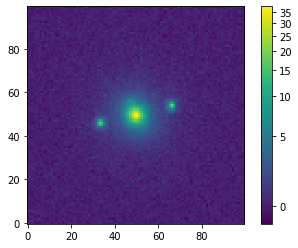

In [13]:
img_idx = 3

img_path = os.path.join(out_data_dir, img_files[img_idx])
img = np.load(img_path)

norm = ImageNormalize(img, interval=MinMaxInterval(), stretch=AsinhStretch())

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
im = ax.imshow(img, origin='lower', norm=norm)
fig.colorbar(im)

print(meta.iloc[img_idx])